In [146]:
pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\aniru\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
print("Hello world! :D")

Hello world! :D


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, f1_score, accuracy_score, classification_report, confusion_matrix
import time

In [3]:
data = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_cleaned_data.csv")
data

,AGE,SEX,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,...,T,N,M,IVC INV,MAX DIA,APPROACH,HISTOPATHOLOGY,GRADE,MONTHS,RECURRENCE
0,32,M,0,0,0,0,1,0,0,0.0,...,2,0,1,0,8.0,2,clear cell,2.0,95,0
1,45,F,0,0,0,0,1,1,0,0.0,...,4,1,1,0,4.9,1,clear cell,2.0,95,0
2,47,M,0,0,0,1,0,0,0,0.0,...,3b,0,1,1,9.0,1,clear cell,3.0,95,0
3,58,M,0,0,0,0,0,1,0,0.0,...,3a,0,0,0,7.0,2,clear cell,2.0,95,1
4,22,M,0,0,0,0,1,0,0,0.0,...,2b,0,0,0,10.4,1,clear cell,2.0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,64,M,0,0,0,0,1,0,0,0.0,...,3a,0,0,0,8.0,1,clear cell,4.0,18,0
691,49,M,0,0,0,0,0,1,0,0.0,...,2a,0,0,0,10.0,1,clear cell,3.0,18,0
692,73,M,0,1,0,0,0,1,0,0.0,...,3b,0,0,1,7.5,2,clear cell,1.0,18,0
693,65,F,0,0,0,0,1,0,0,0.0,...,3a,0,0,0,10.0,1,clear cell,1.0,18,0


In [4]:
data.drop([0], inplace = True)

In [5]:
data.reset_index(drop = True, inplace = True)

In [6]:
data

,AGE,SEX,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,...,T,N,M,IVC INV,MAX DIA,APPROACH,HISTOPATHOLOGY,GRADE,MONTHS,RECURRENCE
0,45,F,0,0,0,0,1,1,0,0.0,...,4,1,1,0,4.9,1,clear cell,2.0,95,0
1,47,M,0,0,0,1,0,0,0,0.0,...,3b,0,1,1,9.0,1,clear cell,3.0,95,0
2,58,M,0,0,0,0,0,1,0,0.0,...,3a,0,0,0,7.0,2,clear cell,2.0,95,1
3,22,M,0,0,0,0,1,0,0,0.0,...,2b,0,0,0,10.4,1,clear cell,2.0,94,0
4,42,M,0,1,0,0,1,0,0,0.0,...,1a,0,0,0,3.0,1,clear cell,NaN,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,64,M,0,0,0,0,1,0,0,0.0,...,3a,0,0,0,8.0,1,clear cell,4.0,18,0
690,49,M,0,0,0,0,0,1,0,0.0,...,2a,0,0,0,10.0,1,clear cell,3.0,18,0
691,73,M,0,1,0,0,0,1,0,0.0,...,3b,0,0,1,7.5,2,clear cell,1.0,18,0
692,65,F,0,0,0,0,1,0,0,0.0,...,3a,0,0,0,10.0,1,clear cell,1.0,18,0


In [7]:
# manual preprocessing time
T_encoding = {'1a':1, '1b':2, '2a':3, '2b':4, '3a':5, '3b':6, '3c':7, '4':8}
data['T'] = data['T'].replace(T_encoding)
data = pd.get_dummies(data, columns = ['SEX', 'SITE', 'HISTOPATHOLOGY', 'APPROACH'])

In [8]:
data.rename(columns = {'SITE_b/l':'SITE_BL', 'SITE_left':'SITE_LEFT', 'SITE_right':'SITE_RIGHT',
                    'HISTOPATHOLOGY_clear cell': 'HISTOPATHOLOGY_CC', 'HISTOPATHOLOGY_papillary':'HISTOPATHOLOGY_PAP'}, inplace = True)

In [9]:
for col in data.columns:
    if data[col].dtype == bool:
        data[col] = data[col].astype('int64')

In [10]:
y = data.pop('RECURRENCE')

In [11]:
oh_cols = data.columns[-10:]
ord_cols = ['T', 'GRADE']
num_cont_cols = ['AGE', 'MAX DIA', 'MONTHS']
num_nom_cols = list(set(data.columns) - set(ord_cols) - set(num_cont_cols) - set(oh_cols))
target = 'RECURRENCE'

In [12]:
X_nt, X_t, y_nt, y_t = train_test_split(data, y, test_size = 0.3, random_state = 0, stratify = y)

In [13]:
X_nt

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_F,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3
141,52,0,0,0,0,0,1,0,0.0,0,...,1,0,0,1,0,1,0,1,0,0
297,61,0,1,0,0,0,0,0,0.0,1,...,0,1,0,1,0,1,0,0,1,0
670,58,0,0,0,0,1,0,0,0.0,0,...,1,0,0,1,0,1,0,0,1,0
364,75,0,1,0,1,0,0,0,0.0,0,...,1,0,0,0,1,1,0,0,1,0
392,17,0,0,0,0,0,1,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,50,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,0,0,1
325,50,0,1,0,0,1,0,0,0.0,0,...,0,1,0,0,1,1,0,1,0,0
608,44,0,0,0,0,1,0,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
664,63,0,0,0,1,0,0,0,0.0,0,...,0,1,0,1,0,1,0,1,0,0


In [14]:
X_t

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_F,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3
437,62,0,1,0,1,0,0,0,0.0,0,...,0,1,0,1,0,1,0,0,1,0
442,52,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,1,0,0
420,60,0,0,0,1,0,0,0,0.0,0,...,1,0,0,1,0,1,0,0,1,0
105,40,0,1,1,1,0,0,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
46,38,0,0,0,0,1,0,0,0.0,0,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,20,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,0,1,0
656,43,0,0,0,0,0,1,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
130,32,0,0,0,1,0,0,0,0.0,0,...,1,0,0,1,0,1,0,1,0,0
145,29,0,0,0,0,1,0,0,0.0,0,...,1,0,0,0,1,1,0,0,0,1


In [15]:
y_t.sum()/len(y_t), y_nt.sum()/len(y_nt)

(0.12440191387559808, 0.12577319587628866)

In [16]:
X_t['RECURRENCE'] = y_t
X_t

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3,RECURRENCE
437,62,0,1,0,1,0,0,0,0.0,0,...,1,0,1,0,1,0,0,1,0,0
442,52,0,0,0,0,1,0,0,0.0,0,...,1,0,1,0,1,0,1,0,0,0
420,60,0,0,0,1,0,0,0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
105,40,0,1,1,1,0,0,0,0.0,0,...,1,0,0,1,1,0,0,1,0,0
46,38,0,0,0,0,1,0,0,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,20,0,0,0,0,1,0,0,0.0,0,...,1,0,1,0,1,0,0,1,0,0
656,43,0,0,0,0,0,1,0,0.0,0,...,1,0,0,1,1,0,0,1,0,0
130,32,0,0,0,1,0,0,0,0.0,0,...,0,0,1,0,1,0,1,0,0,0
145,29,0,0,0,0,1,0,0,0.0,0,...,0,0,0,1,1,0,0,0,1,0


In [17]:
X_t.to_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv")

In [18]:
X_nt['RECURRENCE'] = y_nt

In [19]:
X_nt.to_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv")

In [20]:
y_nt = X_nt.pop('RECURRENCE')

In [21]:
X_nt[X_nt['GRADE'].isna() == True].index

Index([585, 487, 687, 57, 564, 151, 577, 289], dtype='int64')

In [22]:
np.mean(X_nt['GRADE'])

2.010482180293501

In [23]:
arr = np.array(X_nt['GRADE'])
arr = arr[~np.isnan(arr)]
np.median(arr)

2.0

In [24]:
arr1 = np.array(X_nt['GRADE'])
arr1[np.isnan(arr1)]

array([nan, nan, nan, nan, nan, nan, nan, nan])

In [25]:
nan_indices = []
for i in range(len(arr1)):
    if np.isnan(arr1[i]):
        nan_indices.append(i)
print(nan_indices)

[14, 30, 153, 158, 188, 203, 358, 407]


In [26]:
# BASELINE-----------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
im = SimpleImputer(strategy = 'median')
X_nt_imputed = im.fit_transform(X_nt)
print(X_nt_imputed[nan_indices, 15])
del im, X_nt_imputed

[2. 2. 2. 2. 2. 2. 2. 2.]


In [28]:
model = RandomForestClassifier(random_state = 42)

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_nt, y_nt, test_size = 0.3, random_state = 0, stratify = y_nt)

In [30]:
imputer = SimpleImputer(strategy = 'median')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [31]:
model.fit(X_train_imputed, y_train)
y_preds_val = model.predict(X_val_imputed)
accuracy_val = accuracy_score(y_val, y_preds_val)
report = classification_report(y_val, y_preds_val)
print(f"accuracy = {accuracy_val}")
print(report)

accuracy = 0.863013698630137
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       128
           1       0.33      0.11      0.17        18

    accuracy                           0.86       146
   macro avg       0.61      0.54      0.55       146
weighted avg       0.82      0.86      0.83       146



In [32]:
y_preds_train = model.predict(X_train_imputed)
accuracy_train = accuracy_score(y_train, y_preds_train)
report_train = classification_report(y_train, y_preds_train)
print(f"accuracy = {accuracy_train}")
print(report_train)

accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00        43

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339



In [33]:
# 0's are being classified well;
# 1's, not so much. half the predicted 1's are not 1's, and 8/9th of the actual 1's are misclassified.

[[124   4]
 [ 16   2]]


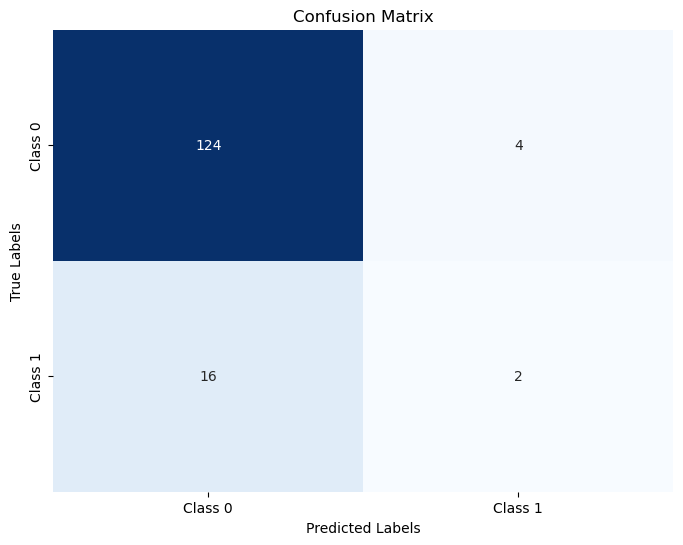

In [34]:
cm = confusion_matrix(y_val, y_preds_val)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
pd.DataFrame(y_val).value_counts()

RECURRENCE
0             128
1              18
Name: count, dtype: int64

In [36]:
pd.DataFrame(y_preds_val).value_counts()

0    140
1      6
Name: count, dtype: int64

In [47]:
X_nt

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_F,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3
141,52,0,0,0,0,0,1,0,0.0,0,...,1,0,0,1,0,1,0,1,0,0
297,61,0,1,0,0,0,0,0,0.0,1,...,0,1,0,1,0,1,0,0,1,0
670,58,0,0,0,0,1,0,0,0.0,0,...,1,0,0,1,0,1,0,0,1,0
364,75,0,1,0,1,0,0,0,0.0,0,...,1,0,0,0,1,1,0,0,1,0
392,17,0,0,0,0,0,1,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,50,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,0,0,1
325,50,0,1,0,0,1,0,0,0.0,0,...,0,1,0,0,1,1,0,1,0,0
608,44,0,0,0,0,1,0,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
664,63,0,0,0,1,0,0,0,0.0,0,...,0,1,0,1,0,1,0,1,0,0


In [98]:
# VERY NAIVE GRID SEARCH---------------------------------------------------------------------------------------------------------------------------------

In [61]:
model1 = RandomForestClassifier(random_state = 42)
imputer1 = SimpleImputer(strategy = 'median')
pipeline1 = Pipeline([
    ('imputer', imputer1),
    ('model', model)
])

In [44]:
param_grid1 = {
    'model__n_estimators':[50, 100, 150, 200],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2, 5, 10],
    'model__min_samples_leaf':[1, 2, 4],
    'model__max_features':['sqrt', 'log2', 8],
    'model__bootstrap':[True, False]
}

In [53]:
tic = time.time()
grid_search = GridSearchCV(estimator = pipeline1, param_grid = param_grid1, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 3)
grid_search.fit(X_nt, y_nt)
best_params1 = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model1 = grid_search.best_estimator_
toc = time.time()
print("Time Taken:", toc - tic)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Time Taken: 147.94766116142273


In [62]:
param_grid2 = {
    'model__n_estimators':[50, 100, 150, 200, 300],
    'model__max_depth':[None, 10, 20, 30],
    'model__min_samples_split':[2, 5, 10, 20],
    'model__min_samples_leaf':[1, 2, 4, 8],
    'model__max_features':['sqrt', 'log2', 6, 7, 8],
    'model__bootstrap':[True, False],
    'model__class_weight':[None, 'balanced']
}

In [63]:
tic = time.time()
grid_search = GridSearchCV(estimator = pipeline1, param_grid = param_grid2, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 3)
grid_search.fit(X_nt, y_nt)
best_params2 = grid_search.best_params_
print("Best Hyperparameters:", best_params2)
best_model2 = grid_search.best_estimator_
toc = time.time()
print("Time Taken:", toc - tic)

Fitting 5 folds for each of 6400 candidates, totalling 32000 fits
Best Hyperparameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Time Taken: 1713.1761682033539


In [64]:
model

RandomForestClassifier(random_state=42)

In [69]:
np.random.randint(50, 200)

151

In [71]:
best_model2.fit(X_nt, y_nt)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=8, min_samples_leaf=8,
                                        n_estimators=150, random_state=42))])

In [72]:
best_params2

{'model__bootstrap': True,
 'model__class_weight': 'balanced',
 'model__max_depth': 10,
 'model__max_features': 8,
 'model__min_samples_leaf': 8,
 'model__min_samples_split': 2,
 'model__n_estimators': 150}

In [74]:
y_t = X_t.pop('RECURRENCE')

In [90]:
y_pred_test2 = best_model2.predict(X_t)

In [91]:
report_test2 = classification_report(y_t, y_pred_test2)
print("Classification Report on Test Set:")
print(report_test2)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       183
           1       0.32      0.46      0.37        26

    accuracy                           0.81       209
   macro avg       0.62      0.66      0.63       209
weighted avg       0.84      0.81      0.82       209



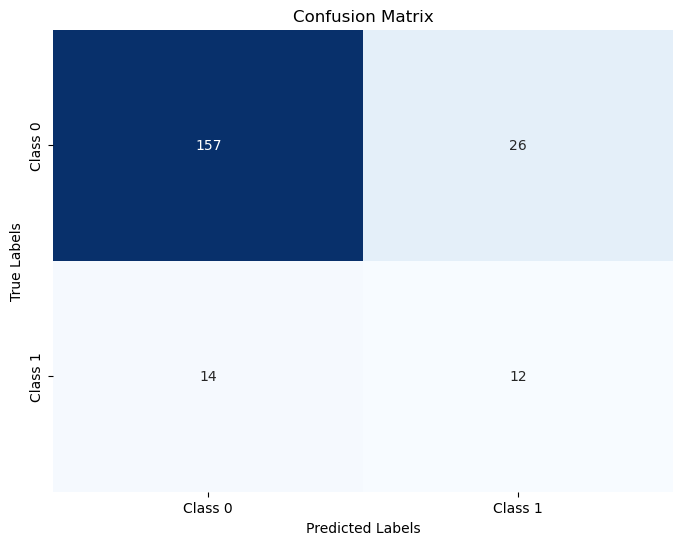

In [142]:
cm = confusion_matrix(y_t, y_pred_test2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [87]:
param_grid3 = {
    'model__n_estimators':[x for x in range(25, 401, 5)]
}

In [88]:
tic = time.time()
grid_search = GridSearchCV(estimator = best_model2, param_grid = param_grid3, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 3)
grid_search.fit(X_nt, y_nt)
best_params3 = grid_search.best_params_
print("Best Hyperparameters:", best_params3)
best_model3 = grid_search.best_estimator_
toc = time.time()
print("Time Taken:", toc - tic)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
Best Hyperparameters: {'model__n_estimators': 210}
Time Taken: 36.9239821434021


In [143]:
best_model3

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=8, min_samples_leaf=8,
                                        n_estimators=210, random_state=42))],
         verbose=True)

In [92]:
y_pred_test3 = best_model3.predict(X_t)
report_test3 = classification_report(y_t, y_pred_test3)
print("Classification Report on Test Set:")
print(report_test3)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       183
           1       0.33      0.46      0.39        26

    accuracy                           0.82       209
   macro avg       0.63      0.67      0.64       209
weighted avg       0.85      0.82      0.83       209



In [93]:
# another uptick in performance!

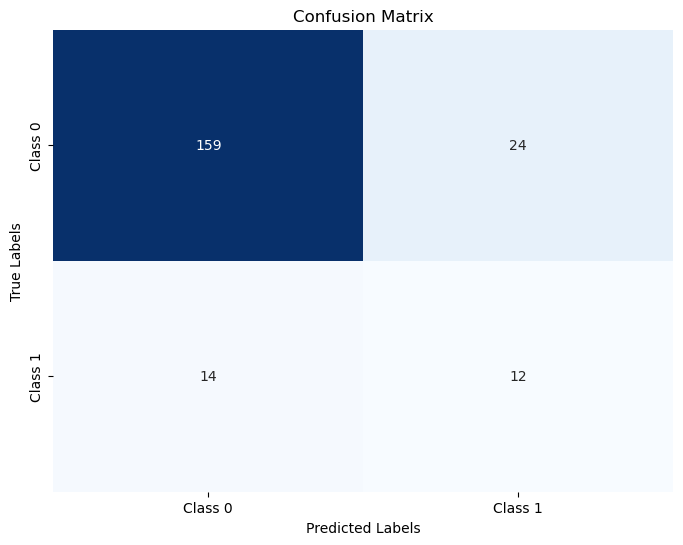

In [94]:
cm = confusion_matrix(y_t, y_pred_test3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:
[1] + [x for x in range(2, 11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [97]:
param_grid4 = {
    'model__max_depth':[None] + [x for x in range(1, 40)]
}
tic = time.time()
grid_search = GridSearchCV(estimator = best_model3, param_grid = param_grid4, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 3)
grid_search.fit(X_nt, y_nt)
best_params4 = grid_search.best_params_
print("Best Hyperparameters:", best_params4)
best_model4 = grid_search.best_estimator_
toc = time.time()
print("Time Taken:", toc - tic)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'model__max_depth': 9}
Time Taken: 22.64936399459839


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       183
           1       0.32      0.46      0.38        26

    accuracy                           0.81       209
   macro avg       0.62      0.66      0.64       209
weighted avg       0.84      0.81      0.83       209



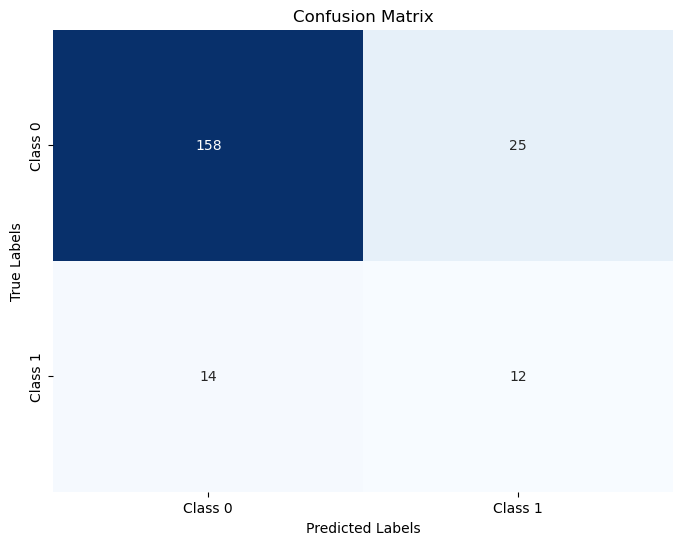

In [116]:
y_pred_test4 = best_model4.predict(X_t)
report_test4 = classification_report(y_t, y_pred_test4)
print("Classification Report on Test Set:")
print(report_test4)
cm = confusion_matrix(y_t, y_pred_test4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [101]:
best_model_current = best_model3

In [104]:
param_grid5 = {
    'model__max_features': ['sqrt', 'log2'] + [x for x in range(6, 28)]
}
tic = time.time()
grid_search = GridSearchCV(estimator = best_model3, param_grid = param_grid5, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 3)
grid_search.fit(X_nt, y_nt)
best_params5 = grid_search.best_params_
print("Best Hyperparameters:", best_params5)
best_model5 = grid_search.best_estimator_
toc = time.time()
print("Time Taken:", toc - tic)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'model__max_features': 8}
Time Taken: 9.8405020236969


In [113]:
param_grid6 = {
    'model__min_samples_leaf': [x for x in range(1, 20)]
}
tic = time.time()
grid_search = GridSearchCV(estimator = best_model3, param_grid = param_grid6, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 3)
grid_search.fit(X_nt, y_nt)
best_params6 = grid_search.best_params_
print("Best Hyperparameters:", best_params6)
best_model6 = grid_search.best_estimator_
toc = time.time()
print("Time Taken:", toc - tic)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best Hyperparameters: {'model__min_samples_leaf': 8}
Time Taken: 7.333902359008789


In [112]:
best_model3, best_model5

(Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('model',
                  RandomForestClassifier(class_weight='balanced', max_depth=10,
                                         max_features=8, min_samples_leaf=8,
                                         n_estimators=210, random_state=42))]),
 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('model',
                  RandomForestClassifier(class_weight='balanced', max_depth=10,
                                         max_features=8, min_samples_leaf=8,
                                         n_estimators=210, random_state=42))]))

In [115]:
param_grid7 = {
    'model__min_samples_split': [x for x in range(2, 20)]
}
tic = time.time()
grid_search = GridSearchCV(estimator = best_model3, param_grid = param_grid7, cv = 5, scoring = 'f1', n_jobs = -1, verbose = 3)
grid_search.fit(X_nt, y_nt)
best_params7 = grid_search.best_params_
print("Best Hyperparameters:", best_params7)
best_model7 = grid_search.best_estimator_
toc = time.time()
print("Time Taken:", toc - tic)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'model__min_samples_split': 17}
Time Taken: 7.316384792327881


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       183
           1       0.32      0.46      0.38        26

    accuracy                           0.81       209
   macro avg       0.62      0.66      0.64       209
weighted avg       0.84      0.81      0.83       209



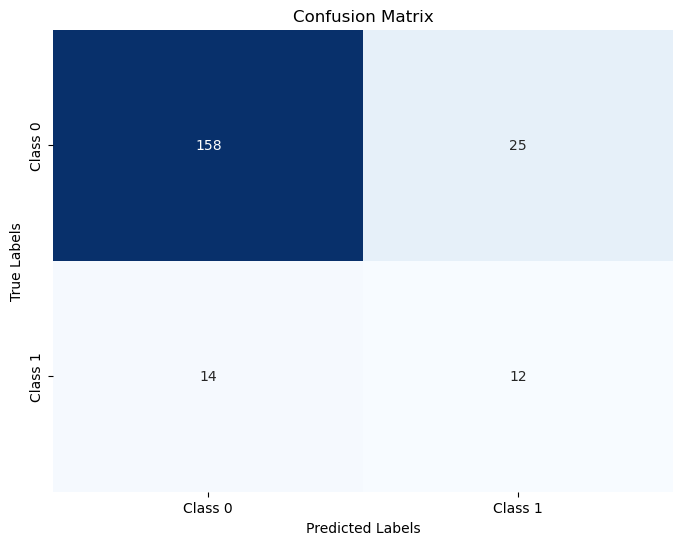

In [117]:
y_pred_test7 = best_model7.predict(X_t)
report_test7 = classification_report(y_t, y_pred_test7)
print("Classification Report on Test Set:")
print(report_test7)
cm = confusion_matrix(y_t, y_pred_test7)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       183
           1       0.33      0.46      0.39        26

    accuracy                           0.82       209
   macro avg       0.63      0.67      0.64       209
weighted avg       0.85      0.82      0.83       209



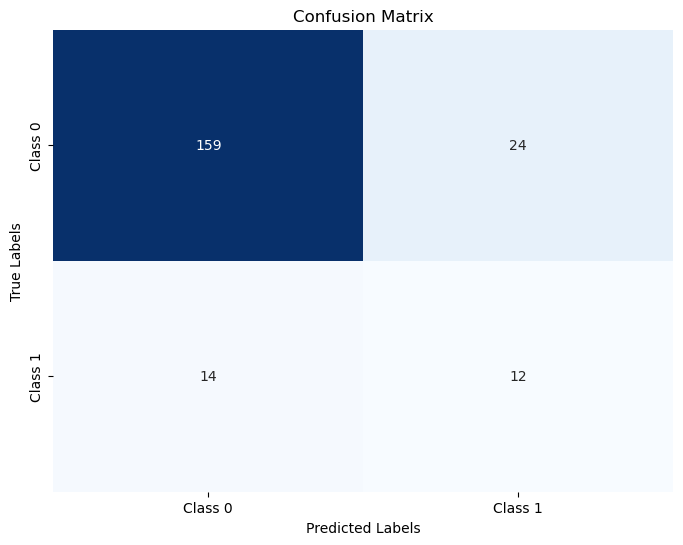

In [120]:
y_pred_test_ind = best_model3.predict(X_t)
report_test_ind = classification_report(y_t, y_pred_test_ind)
print("Classification Report on Test Set:")
print(report_test_ind)
cm = confusion_matrix(y_t, y_pred_test_ind)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [95]:
# param_grid2 = {
#     'model__n_estimators':[50, 100, 150, 200, 300],
#     'model__max_depth':[None, 10, 20, 30],
#     'model__min_samples_split':[2, 5, 10, 20],
#     'model__min_samples_leaf':[1, 2, 4, 8],
#     'model__max_features':['sqrt', 'log2', 6, 7, 8],
#     'model__bootstrap':[True, False],
#     'model__class_weight':[None, 'balanced']
# }

# {'model__bootstrap': True,
#  'model__class_weight': 'balanced',
#  'model__max_depth': 10,
#  'model__max_features': 8,
#  'model__min_samples_leaf': 8,
#  'model__min_samples_split': 2,
#  'model__n_estimators': 150}
# class_weight = 'balanced' 
# bootstrap = True.
# n_estimators = 210 (range: 150-250)
# max_depth = 9 reduces performance, hence max_depth = 10 (range: 5-15)
# max_features = 8 only
# min_samples_leaf = 8
# min_samples_split = 17 leads to a downturn, so min_samples_split = 2

In [123]:
np.sqrt(27), np.log2(27)

(5.196152422706632, 4.754887502163468)

In [124]:
param_grid8 = {
    'model__n_estimators':[x for x in range(150, 251, 10)],
    'model__max_depth':[x for x in range(5, 16)],
    'model__min_samples_split':[2, 5, 10, 15, 20],
    'model__min_samples_leaf':[4, 6, 8, 10, 12],
    'model__max_features':[5, 6, 7, 8, 9, 10],
    'model__bootstrap':[True],
    'model__class_weight':['balanced']
}

In [125]:
tic = time.time()
grid_search = GridSearchCV(estimator = best_model3, param_grid = param_grid8, cv = 10, scoring = 'f1', n_jobs = -1, verbose = 3)
grid_search.fit(X_nt, y_nt)
best_params8 = grid_search.best_params_
print("Best Hyperparameters:", best_params8)
best_model8 = grid_search.best_estimator_
toc = time.time()
print("Time Taken:", toc - tic)

Fitting 10 folds for each of 18150 candidates, totalling 181500 fits
Best Hyperparameters: {'model__bootstrap': True, 'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__max_features': 7, 'model__min_samples_leaf': 12, 'model__min_samples_split': 2, 'model__n_estimators': 180}
Time Taken: 10716.729909181595


In [127]:
10716/3600

2.9766666666666666

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       183
           1       0.32      0.46      0.37        26

    accuracy                           0.81       209
   macro avg       0.62      0.66      0.63       209
weighted avg       0.84      0.81      0.82       209



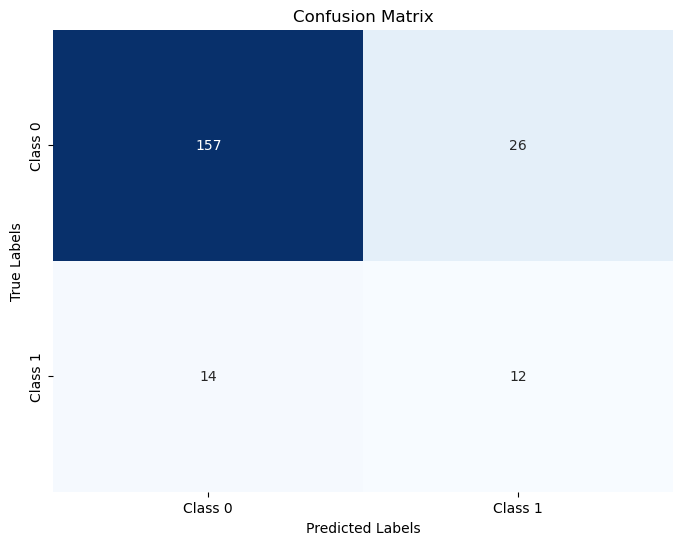

In [128]:
y_pred_test8 = best_model8.predict(X_t)
report_test8 = classification_report(y_t, y_pred_test8)
print("Classification Report on Test Set:")
print(report_test8)
cm = confusion_matrix(y_t, y_pred_test8)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [145]:
best_model_current.get_params()

{'memory': None,
 'steps': [('imputer', SimpleImputer(strategy='median')),
  ('model',
   RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                          min_samples_leaf=8, n_estimators=210, random_state=42))],
 'verbose': True,
 'imputer': SimpleImputer(strategy='median'),
 'model': RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                        min_samples_leaf=8, n_estimators=210, random_state=42),
 'imputer__add_indicator': False,
 'imputer__copy': True,
 'imputer__fill_value': None,
 'imputer__keep_empty_features': False,
 'imputer__missing_values': nan,
 'imputer__strategy': 'median',
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': 'balanced',
 'model__criterion': 'gini',
 'model__max_depth': 10,
 'model__max_features': 8,
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 8,
 'model__min_samples_sp

In [137]:
best_model_current.verbose = True

In [139]:
best_model_current.fit(X_nt, y_nt)

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.5s


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=8, min_samples_leaf=8,
                                        n_estimators=210, random_state=42))],
         verbose=True)

In [140]:
best_model_current.predict(X_t)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)